<a href="https://colab.research.google.com/github/Sifatkhan-1915020/deeplearning-/blob/main/CNN_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the library**

In [80]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

**Set Param**

In [81]:
plt.rc('figure',autolayout=True)
plt.rc('image', cmap='magma')

**kernel declaration**

In [82]:
kernel = tf.constant([[-1,-1,-1],
                      [-1,-8,-1],
                      [-1,-1,-1],
                      ])

Load the image

In [83]:
image=tf.io.read_file('kuet.jpg')
image=tf.io.decode_jpeg(image,channels=1)
image=tf.image.resize(image,size=[300,300])

plot the image

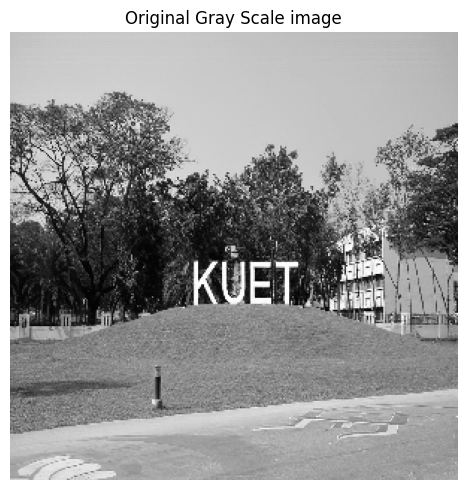

In [84]:
img=tf.squeeze(image).numpy()
plt.figure(figsize=(5,5))
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show()

Reformat

In [85]:
image=tf.image.convert_image_dtype(image,dtype=tf.float32)
image=tf.expand_dims(image,axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

conv layer

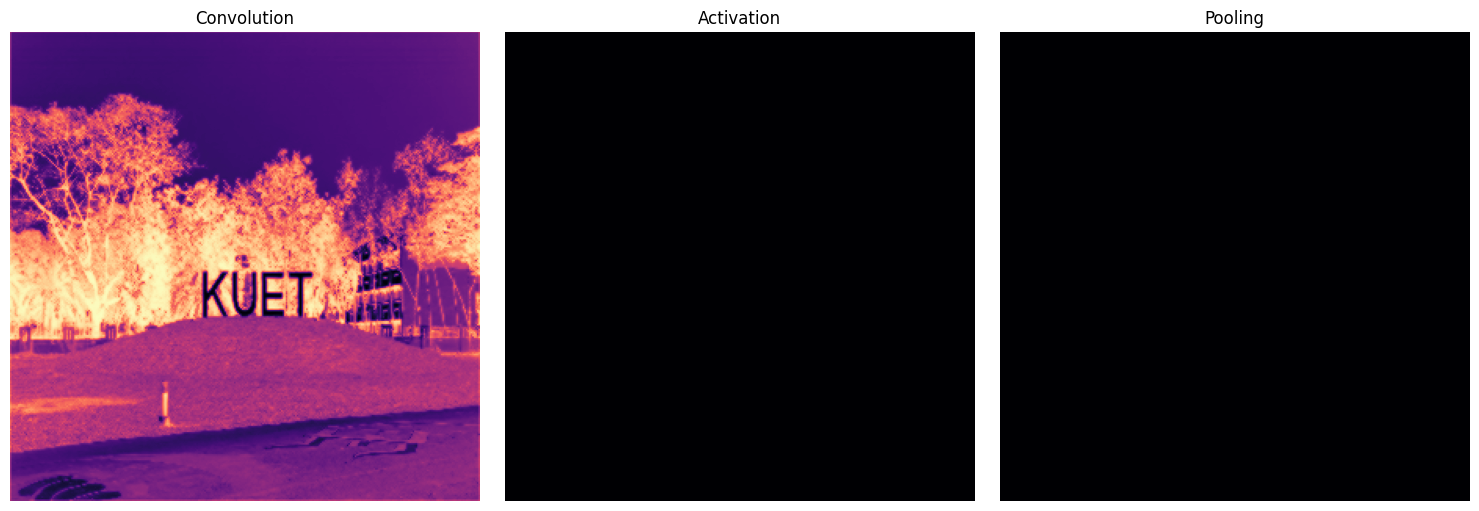

In [86]:
# convolution layer
conv_fn = tf.nn.conv2d

image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',
)

plt.figure(figsize=(15, 5))
# Plot the convolved image
plt.subplot(1, 3, 1)

plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')

# activation layer
relu_fn = tf.nn.relu
# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)

plt.axis('off')
plt.title('Activation')

# Pooling layer
pool = tf.nn.pool
image_condense = pool(input=image_detect,
                             window_shape=(2, 2),
                             pooling_type='MAX',
                             strides=(2, 2),
                             padding='SAME',
                            )

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()